In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tabata as tbt
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import t

In [289]:
facteurs = pd.read_excel('data_exercice.xlsx', 'Facteurs')
cout = pd.read_excel('data_exercice.xlsx', 'Cout')
facteurs.head()



,Id,Version,D1,D2,Panne,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,348606,v3,13665.09,11751.56,G,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,348762,v2,4888.38,3944.48,A,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,348855,v1,10273.96,13592.97,A,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0
3,348906,v2,2149.26,3965.84,C,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,348946,v3,1.13,6.23,D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [290]:
cout.head()


,Id,Panne,Cout
0,349483,A,15.84
1,350021,D,19.14
2,350212,B,9.90
3,351351,F,4.40
4,351351,F,28.16


## Etape 1 :  Décrire les données. On cherche à identifier les types des variables et leur domaine de définition ainsi que les valeurs manquantes et les valeurs extrêmes.

In [291]:
#Type des variables 
print("Les variables que l'on peut retrouver dans le dataframe facteurs : ")
print(facteurs.dtypes)
print("Les variables que l'on peut retrouver dans le dataframe cout : ")
print(cout.dtypes)

Les variables que l'on peut retrouver dans le dataframe facteurs : 
Id           int64
Version     object
D1         float64
D2         float64
Panne       object
X1           int64
X2           int64
X3           int64
X4           int64
X5           int64
X6           int64
X7           int64
X8           int64
X9           int64
X10          int64
X11          int64
X12          int64
X13          int64
X14          int64
X15          int64
dtype: object
Les variables que l'on peut retrouver dans le dataframe cout : 
Id         int64
Panne     object
Cout     float64
dtype: object


In [292]:
#Domaine de définition des variables

#Liste des pièces recensée dans la table facteur
def_Id_fact = facteurs.groupby('Id').sum(0)#On enlève les doublons 
def_Id_fact = def_Id_fact.drop(['Version','D1','D2','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15'],1)#On garde la variable 'Panne' de manière à comptabiliser le nombre de lignes
print("Nombre de pièces recensées dans la table facteur : ")
print(def_Id_fact.size)

Nombre de pièces recensées dans la table facteur : 
451


/Users/martinduguey/Documents/MACS3/S1/Statistiques descriptives/Examen/EnvStatsD/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [293]:
#Liste des pièces recensée dans la table cout
def_Id_cout = cout.groupby('Id').sum(0)#On enlève les doublons en sommant les coûts
def_Id_cout = def_Id_cout.drop(['Cout'],1)
print("Nombre de pièces recensées dans la table cout : ")
print(def_Id_cout.size)

Nombre de pièces recensées dans la table cout : 
75


/Users/martinduguey/Documents/MACS3/S1/Statistiques descriptives/Examen/EnvStatsD/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Table facteurs :

451 pièces répertoriées.$\\$
Versions : v1, v2 et v3.$\\$
Pannes identifées : A,B,C,D,E,F,G,H,I.$\\$
Périodes d'utilisation: D1 et D2.$\\$
Composant Xi avec $i \in \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15\}\\$
et $Xi \in \{0,1\}$.$\\$ 

Table cout :

75 pièces rrépertoriées.$\\$
Pannes identifées : A,B,C,D,E,F,G,I.$\\$
Cout : pour une pièce et une panne donnée. Il n'y à priori pas de cout pour toutes les combinaisons $\{pieces, panne\}$ listées dans la table facteur, puisque le cout d'aucune panne H, quelque soit la pièce, n'est détaillé dans cette table.$\\$

In [294]:
#Valeurs manquantes
print(facteurs.isnull().count())
print(cout.isnull().count())
print("Taille du dataframe facteurs :")
print(facteurs.shape)
print("Taille du dataframe cout :")
print(cout.shape)

Id         461
Version    461
D1         461
D2         461
Panne      461
X1         461
X2         461
X3         461
X4         461
X5         461
X6         461
X7         461
X8         461
X9         461
X10        461
X11        461
X12        461
X13        461
X14        461
X15        461
dtype: int64
Id       109
Panne    109
Cout     109
dtype: int64
Taille du dataframe facteurs :
(461, 20)
Taille du dataframe cout :
(109, 3)


Les deux tables ne contiennent aucune valeur manquante puisque chaque variable possède autant de valeurs que le nombre de ligne de la table.  

In [295]:
# Moyenne et variance des variables D1, D2 et Cout

print("Moyenne de D1 : ")
print(facteurs['D1'].mean())
print("Moyenne de D2 : ")
print(facteurs['D2'].mean())
print("Moyenne de Cout : ")
print(cout['Cout'].mean())

Moyenne de D1 : 
7894.474143167028
Moyenne de D2 : 
8828.157114967462
Moyenne de Cout : 
32.1240366972477


## Etape 2 : Répartition des composants en fonction du nombre de pannes dans lesquelles ils sont impliqués.

In [296]:
facteurs1 = facteurs.drop(['Id','Version','D1','D2','Panne'],1) #On fait nos manipulations sur une copie du dataframe.
nb_p_comp = facteurs1.sum(0) #On fait la somme des pannes pour chaque composant.
comp = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15'] #Les composants en questions

#On affiche un diagramme
# plt.figure(1,figsize=(10,6))
# plt.bar(comp, nb_p_comp)
# plt.xlabel('Composants')
# plt.ylabel('Nombre de pannes')
# plt.show()
fig_comp = go.Figure(data=[go.Bar(
            x=comp, 
            y=nb_p_comp,
            text=nb_p_comp,
            textposition='auto',
            name='Occurences des composants par pannes',
            marker=dict(
                color='rgba(122, 169, 168, 0.8)',
            line=dict(color='rgba(122, 169, 168, 1.)', width=3))
)])

fig_comp.update_layout(
    xaxis_title="Composants",
    yaxis_title="Nombre de pannes"
)
fig_comp.show()


/Users/martinduguey/Documents/MACS3/S1/Statistiques descriptives/Examen/EnvStatsD/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



## Étape 3 : Existe-t-il un lien entre le nombre de pannes dans lequel un composant est impliqué et les coûts de réparation associés à ses pannes ?

Comme il y a plus de pannes identifiées dans la table facteurs que dans la table coût, on ne garde dans la table facteurs que les lignes concernant les pièces et les pannes répertoriées dans la table coût.

In [297]:
#Fonction filtre de la table facteurs
def filtre_facteurs(df_facteurs, df_cout):
    """Fonction filtre_facteurs
    
    Arguments
        df_facteurs : DataFrame facteurs
            input variable 1
        df_cout : DataFrame cout
            input variable 2
        
    Returns
        df_facteurs_red : DataFrame facteurs réduit aux pièces et pannes 
        répertoriées dans le DataFrame cout.

        df_cout : Dataframe des couts groupés par identifiants et pannes.
        Lorsque les identifiants et les pannes de plusieurs lignes sont identiques, on les regroupe en sommant les couts.
    """
    # On instancie notre df_facteurs_red
    df_facteurs_red = df_facteurs

    # On enlève les doublons de cout en sommant quand l'identifiant et la panne sont identiques
    df_cout_red = df_cout.groupby(['Id','Panne']).sum(0)

    # On récupère les identifiants et les pannes des pièces de cout.
    cout_id = np.zeros(df_cout_red.size)
    cout_panne = np.array(['' for k in range(df_cout_red.size)])

    for i in range(df_cout_red.size):
        cout_id[i] = df_cout_red.index[i][0]
        cout_panne[i] = df_cout_red.index[i][1]
    
    # On récupère les pannes et identifiants des pièces de facteurs.
    facteurs_panne = df_facteurs_red.drop(['Version', 'D1', 'D2', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15'],1)
    facteurs_panne = facteurs_panne.to_numpy()

    ind_ligne_sup = np.arange(df_facteurs_red.shape[0]) 

    # On trie ensuite les pannes et identifiants qui nous intéressent, en l'occurence ceux se trouvant dans la table cout
    for i in range(cout_panne.size):
        ligne_val = []
        liste = np.argwhere(facteurs_panne==cout_panne[i])
        if (liste.shape[0]>0):
            for k in range(liste.shape[0]):
                if (facteurs_panne[liste[k][0],0]==int(cout_id[i])):
                    ligne_val.append(liste[k][0]) 

        ligne_val = np.array(ligne_val) 
             
        for j in range(ligne_val.size):
            ind_ligne_sup = np.delete(ind_ligne_sup, np.where(ind_ligne_sup == ligne_val[j])) # On enlève les lignes qui vérifient
                                                                                                 # la condition ci-dessus de la liste
                                                                                                 # des lignes à supprimer. 

    # On modifie alors df_facteur_red pour ne garder que les idenfiants et les pannes qui nous intéressent
    df_facteurs_red = df_facteurs_red.drop(df_facteurs_red.index[ind_ligne_sup])

    return df_facteurs_red, df_cout_red

In [298]:
# On applique la fonction filtre_facteurs à notre jeu de données

df_facteurs_red, df_cout_red = filtre_facteurs(facteurs, cout)

/Users/martinduguey/Documents/MACS3/S1/Statistiques descriptives/Examen/EnvStatsD/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Maintenant, on aimerait avoir, pour chaque composant, le cout total des frais de reparation des pannes dans lesquelles il est impliqué. On choisit de travailler sur les dataframes df_facteurs_red et df_cout_red pour être sûr qu'on travaille avec des données complètes.

In [299]:
# Refonte du DataFrame df_cout_red

Id = np.zeros(df_cout_red.shape[0])
Panne = np.array(['' for k in range(df_cout_red.shape[0])])
ind = np.arange(df_cout_red.shape[0])
Id = Id.astype(int)

for i in range(df_cout_red.shape[0]):
    Id[i] = df_cout_red.index[i][0]
    Panne[i] = df_cout_red.index[i][1]

df_cout_red.insert(0, "Id", Id, allow_duplicates=False)
df_cout_red.insert(1, "Panne", Panne, allow_duplicates=False)

df_cout_red = df_cout_red.set_index(ind)

In [300]:
# Fonction get_cout 

def get_cout(id, panne):
    """Fonction get_cout 

        ATTENTION : Fonction basée sur le DataFrame df_cout_red
    
    Arguments
        id : identifiant de la pièce
        panne : panne de la pièce
        
    Returns
        res : cout de réparation pour la pièce et la panne correspondante
    """
    # Recherche du cout correspondant
    res = df_cout_red.loc[(df_cout_red['Id'] == id) & (df_cout_red['Panne'] == panne), ['Cout']]

    # Convertion pour renvoyer un float
    res = res.to_numpy()[0][0]

    return res

In [301]:
# Loi du coût 
param = 0.15
dens_cout = lambda x : param*np.exp(-param*x)
pts_couts = np.linspace(0,200,100)


fig_distribution_cout = go.Figure()
fig_distribution_cout.add_trace(go.Histogram(
    x=df_cout_red['Cout'],
    histnorm='probability',
    name='Estimation de la densité de la loi cout', 
    xbins=dict( # bins 
        start=0.0,
        end=200.0,
        size=10
    ),
    marker_color='#8993EB',
    opacity=0.75
))
fig_distribution_cout.add_trace(go.Scatter(
    x=pts_couts, 
    y=dens_cout(pts_couts), 
    name='Loi exponentielle de paramètre 0.15',
    mode='lines',
))
fig_distribution_cout.update_layout(
    xaxis_title="Cout",
    yaxis_title="Densité de probabilité"
)
fig_distribution_cout.show()

In [302]:
# Loi de la durée

fig_distribution_duree = go.Figure()
fig_distribution_duree.add_trace(go.Histogram(
    x=facteurs['D1']+facteurs['D2'],
    histnorm='probability',
    name='Estimation de la densité de la loi durée', 
    xbins=dict( # bins 
        start=0.0,
        end=80000.0,
        size=1000
    ),
    marker_color='#8993EB',
    opacity=0.75
))
fig_distribution_duree.update_layout(
    xaxis_title="Durée",
    yaxis_title="Densité de probabilité"
)
fig_distribution_duree.show()

#### 3.1 Identification des tendances

In [303]:
# Comptage 

occurrences = np.zeros(15)
cout_rep = np.zeros(15)

for i in range(df_facteurs_red.shape[0]):
    for j in range(15):
        comp_def = df_facteurs_red.iloc[i,j+5]
        if (comp_def == 1):
            occurrences[j] += comp_def
            cout_rep[j] += get_cout(df_facteurs_red.iloc[i,0], df_facteurs_red.iloc[i,4])


In [304]:
# Affichage bar plot 

occurences = occurrences.astype(int)
cout_rep = cout_rep.astype(float)
donnees_barh = {'Comp' : comp, 'Occ' : occurrences, 'Cout' : cout_rep}
df_barh = pd.DataFrame(data=donnees_barh)

df_barh_occ = df_barh.sort_values(by=['Occ'])
#plt.figure(1,figsize=(10,6))
#plt.barh(df_barh_occ['Comp'], df_barh_occ['Occ'])
#plt.show()

fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_barh_occ['Comp'],
    x=df_barh_occ['Occ'],
    text=df_barh_occ['Occ'],
    textposition='outside',
    name='Occurences',
    orientation='h',
    marker=dict(
        color='rgba(122, 169, 168, 0.8)',
        line=dict(color='rgba(122, 169, 168, 1.)', width=3)
    )
))

fig.update_layout(
    xaxis_title="Nombre de pannes",
    yaxis_title="Composants",
    barmode='stack')
fig.show()



In [305]:
df_barh_cout = df_barh.sort_values(by=['Occ'])
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_barh_cout['Comp'],
    x=df_barh_cout['Cout'],
    text=df_barh_cout['Cout'].astype(int),
    textposition='outside',
    name='Cout',
    orientation='h',
    marker=dict(
        color='rgba(122, 169, 168, 0.8)',
        line=dict(color='rgba(122, 169, 168, 1.)', width=3)
    )
))

fig.update_layout(
    xaxis_title="Cout des réparations",
    yaxis_title="Composants",
    barmode='stack')
fig.show()

In [306]:
# Comptage (en prenant en compte les versions)

occurrences_v1 = np.zeros(15)
occurrences_v2 = np.zeros(15)
occurrences_v3 = np.zeros(15)
cout_rep_v1 = np.zeros(15)
cout_rep_v2 = np.zeros(15)
cout_rep_v3 = np.zeros(15)


for i in range(df_facteurs_red.shape[0]):
    for j in range(15):
        comp_def = df_facteurs_red.iloc[i,j+5]
        if (comp_def == 1):
            if(df_facteurs_red.iloc[i,1]=='v1'):
                occurrences_v1[j] += comp_def
                cout_rep_v1[j] += get_cout(df_facteurs_red.iloc[i,0], df_facteurs_red.iloc[i,4])
            if(df_facteurs_red.iloc[i,1]=='v2'):
                occurrences_v2[j] += comp_def
                cout_rep_v2[j] += get_cout(df_facteurs_red.iloc[i,0], df_facteurs_red.iloc[i,4])
            if(df_facteurs_red.iloc[i,1]=='v3'):
                occurrences_v3[j] += comp_def
                cout_rep_v3[j] += get_cout(df_facteurs_red.iloc[i,0], df_facteurs_red.iloc[i,4])


In [307]:
# Affichage bar plot

donnees_barh_version = {'Comp' : comp, 'Occ_v1' : occurrences_v1, 'Occ_v2' : occurrences_v2, 'Occ_v3' : occurrences_v3, 'Occ_tot' : occurrences_v1+occurrences_v2+occurrences_v3, 'Cout_v1' : cout_rep_v1, 'Cout_v2' : cout_rep_v2, 'Cout_v3' : cout_rep_v3, 'Cout_tot' : cout_rep_v1+cout_rep_v2+cout_rep_v3}
df_barh_version = pd.DataFrame(data=donnees_barh_version)

df_barh_version_occ = df_barh_version.sort_values(by=['Occ_tot'])

fig_occ = go.Figure()
fig_occ.add_trace(go.Bar(
    y=df_barh_version_occ['Comp'],
    x=df_barh_version_occ['Occ_v1'],
    name='v1',
    orientation='h',
    marker=dict(
        color='rgba(118, 68, 138, 0.8)',
        line=dict(color='rgba(118, 68, 138, 1.)', width=3)
    )
))
fig_occ.add_trace(go.Bar(
    y=df_barh_version_occ['Comp'],
    x=df_barh_version_occ['Occ_v2'],
    name='v2',
    orientation='h',
    marker=dict(
        color='rgba(155, 89, 182, 0.8)',
        line=dict(color='rgba(155, 89, 182, 1.)', width=3)
    )
))
fig_occ.add_trace(go.Bar(
    y=df_barh_version_occ['Comp'],
    x=df_barh_version_occ['Occ_v3'],
    text=df_barh_version_occ['Occ_tot'],
    textposition='outside',
    name='v3',
    orientation='h',
    marker=dict(
        color='rgba(195, 155, 211, 0.8)',
        line=dict(color='rgba(195, 155, 211, 1)', width=3)
    )
))

fig_occ.update_layout(
    xaxis_title="Nombre de pannes",
    yaxis_title="Composants",
    barmode='stack')
fig_occ.show()

In [308]:
# Affichage bar plot

df_barh_version_cout = df_barh_version.sort_values(by=['Occ_tot'])

fig_cout = go.Figure()
fig_cout.add_trace(go.Bar(
    y=df_barh_version_cout['Comp'],
    x=df_barh_version_cout['Cout_v1'],
    name='v1',
    orientation='h',
    marker=dict(
        color='rgba(118, 68, 138, 0.8)',
        line=dict(color='rgba(118, 68, 138, 1.)', width=3)
    )
))
fig_cout.add_trace(go.Bar(
    y=df_barh_version_cout['Comp'],
    x=df_barh_version_cout['Cout_v2'],
    name='v2',
    orientation='h',
    marker=dict(
        color='rgba(155, 89, 182, 0.8)',
        line=dict(color='rgba(155, 89, 182, 1.)', width=3)
    )
))
fig_cout.add_trace(go.Bar(
    y=df_barh_version_cout['Comp'],
    x=df_barh_version_cout['Cout_v3'],
    text=df_barh_version_cout['Cout_tot'].astype(int),
    textposition='outside',
    name='v3',
    orientation='h',
    marker=dict(
        color='rgba(195, 155, 211, 0.8)',
        line=dict(color='rgba(195, 155, 211, 1.)', width=3)
    )
))

fig_cout.update_layout(
    xaxis_title="Cout des réparations",
    yaxis_title="Composants",
    barmode='stack')
fig_cout.show()

In [309]:
fig = px.scatter(df_barh, x="Occ", y="Cout", color="Comp",
                labels={
                     "Occ": "Occurences",
                     "Cout": "Cout",
                     "Comp": "Composant"
                 })
fig.show()

#### 3.2 Modèle linéaire

In [310]:
# Régression linéaire 
x = np.array(df_barh['Occ'])
y = np.array(df_barh['Cout'])

coef_directeur, ordonne_ao, corr, p_value, err = stats.linregress(x, y)

x_occ = np.linspace(0,35,100)
fig1 = px.line(x=x_occ, y= coef_directeur*x_occ + ordonne_ao, labels={'x':'occurences', 'y':'modèle'})
fig2 = px.scatter(df_barh, x="Occ", y="Cout", color="Comp", labels={
                     "Occ": "Occurences",
                     "Cout": "Cout",
                     "Comp": "Composant"
                 })
fig = go.Figure(data=fig1.data + fig2.data)
fig.update_layout(
    xaxis_title='Occurences',
    yaxis_title='Cout'
)
fig.show()


#### 3.3 Éléments du modèle

In [311]:
print("Coefficient directeur : ")
print(coef_directeur)
print("Ordonnée à l'origine : ")
print(ordonne_ao)
print("Correlation : ")
print(corr)
print("p-value : ")
print(p_value)
print("R^2 : ")
print(corr**2)

Coefficient directeur : 
55.994606158378375
Ordonnée à l'origine : 
-28.72158097776571
Correlation : 
0.9743889244768242
p-value : 
8.345558229892926e-10
R^2 : 
0.9494337761431023


## Etape 4 : Existe-t-il un lien entre le nombre de pannes dans lequel un composant est impliqué et la durée d'utilisation des pièces auxquelles il est associé?

#### 4.1 Identification des tendances

In [312]:
# Comptage 

occurrences2_v1 = np.zeros(15)
occurrences2_v2 = np.zeros(15)
occurrences2_v3 = np.zeros(15)
duree_v1 = np.zeros(15)
duree_v2 = np.zeros(15)
duree_v3 = np.zeros(15)

for i in range(facteurs.shape[0]):
    for j in range(15):
        comp_def = facteurs.iloc[i,j+5]
        if (comp_def == 1):
            if(facteurs.iloc[i,1]=='v1'):
                occurrences2_v1[j] += comp_def
                duree_v1[j] += facteurs.iloc[i,2] + facteurs.iloc[i,3]
            if(facteurs.iloc[i,1]=='v2'):
                occurrences2_v2[j] += comp_def
                duree_v2[j] += facteurs.iloc[i,2] + facteurs.iloc[i,3]
            if(facteurs.iloc[i,1]=='v3'):
                occurrences2_v3[j] += comp_def
                duree_v3[j] += facteurs.iloc[i,2] + facteurs.iloc[i,3]

In [313]:
# Affichage bar plot

occurrences2_v1 = occurrences2_v1.astype(int)
occurrences2_v2 = occurrences2_v2.astype(int)
occurrences2_v3 = occurrences2_v3.astype(int)
duree_v1 = duree_v1.astype(float)
duree_v2 = duree_v2.astype(float)
duree_v3 = duree_v3.astype(float)
donnees_barh_d = {'Comp' : comp, 'Occ_v1' : occurrences2_v1, 'Occ_v2' : occurrences2_v2, 'Occ_v3' : occurrences2_v3, 'Occ_tot' : occurrences2_v1+occurrences2_v2+occurrences2_v3, 'Duree_v1' : duree_v1, 'Duree_v2' : duree_v2, 'Duree_v3' : duree_v3, 'Duree_tot' : duree_v1+duree_v2+duree_v3}
df_barh_d = pd.DataFrame(data=donnees_barh_d)

df_barh_dd = df_barh_d.sort_values(by=['Occ_tot'])
#plt.figure(1,figsize=(10,6))
#plt.barh(df_barh_occ['Comp'], df_barh_occ['Occ'])
#plt.show()

fig_occ = go.Figure()
fig_occ.add_trace(go.Bar(
    y=df_barh_dd['Comp'],
    x=df_barh_dd['Duree_v1'],
    name='v1',
    orientation='h',
    marker=dict(
        color='rgba(118, 68, 138, 0.8)',
        line=dict(color='rgba(118, 68, 138, 1.)', width=3)
    )
))
fig_occ.add_trace(go.Bar(
    y=df_barh_dd['Comp'],
    x=df_barh_dd['Duree_v2'],
    name='v2',
    orientation='h',
    marker=dict(
        color='rgba(155, 89, 182, 0.8)',
        line=dict(color='rgba(155, 89, 182, 1.)', width=3)
    )
))
fig_occ.add_trace(go.Bar(
    y=df_barh_dd['Comp'],
    x=df_barh_dd['Duree_v3'],
    text=df_barh_dd['Duree_tot'].astype(int),
    textposition='outside',
    name='v3',
    orientation='h',
    marker=dict(
        color='rgba(195, 155, 211, 0.8)',
        line=dict(color='rgba(195, 155, 211, 1)', width=3)
    )
))

fig_occ.update_layout(
    xaxis_title="Nombre de pannes",
    yaxis_title="Composants",
    barmode='stack')
fig_occ.show()

In [314]:
fig_occ = go.Figure()
fig_occ.add_trace(go.Bar(
    y=df_barh_dd['Comp'],
    x=df_barh_dd['Occ_v1'],
    name='v1',
    orientation='h',
    marker=dict(
        color='rgba(118, 68, 138, 0.8)',
        line=dict(color='rgba(118, 68, 138, 1.)', width=3)
    )
))
fig_occ.add_trace(go.Bar(
    y=df_barh_dd['Comp'],
    x=df_barh_dd['Occ_v2'],
    name='v2',
    orientation='h',
    marker=dict(
        color='rgba(155, 89, 182, 0.8)',
        line=dict(color='rgba(155, 89, 182, 1.)', width=3)
    )
))
fig_occ.add_trace(go.Bar(
    y=df_barh_dd['Comp'],
    x=df_barh_dd['Occ_v3'],
    text=df_barh_dd['Occ_tot'],
    textposition='outside',
    name='v3',
    orientation='h',
    marker=dict(
        color='rgba(195, 155, 211, 0.8)',
        line=dict(color='rgba(195, 155, 211, 1)', width=3)
    )
))

fig_occ.update_layout(
    xaxis_title="Nombre de pannes",
    yaxis_title="Composants",
    barmode='stack')
fig_occ.show()

In [315]:
fig = px.scatter(df_barh_d, x="Occ_tot", y="Duree_tot", color="Comp",
            labels={
                     "Occ_tot": "Occurences",
                     "Duree_tot": "Durée de fonctionnement",
                     "Comp": "Composant"
                 })
fig.show()

#### 4.2 Modèle linéaire

In [316]:
# Régression linéaire 
x2 = np.array(df_barh_d['Occ_tot'])
y2 = np.array(df_barh_d['Duree_tot'])

coef_directeur2, ordonne_ao2, corr2, p_value2, err2 = stats.linregress(x2, y2)

x_occ = np.linspace(0,250,100)
fig1 = px.line(x=x_occ, y= coef_directeur2*x_occ + ordonne_ao2, labels={'x':'occurences', 'y':''})
fig2 = px.scatter(df_barh_d, x="Occ_tot", y="Duree_tot", color="Comp")
fig = go.Figure(data=fig1.data + fig2.data)
fig.update_layout(
    xaxis_title='Occurences',
    yaxis_title='Durée de fonctionnement'
)
fig.show()

#### 4.3 Éléments du modèle

In [317]:
print("Coefficient directeur : ")
print(coef_directeur2)
print("Ordonnée à l'origine : ")
print(ordonne_ao2)
print("Correlation : ")
print(corr2)
print("p-value : ")
print(p_value2)
print("R^2 : ")
print(corr2**2)

Coefficient directeur : 
17221.93076927974
Ordonnée à l'origine : 
-19407.78226062865
Correlation : 
0.9983743401554401
p-value : 
1.4565634725203572e-17
R^2 : 
0.9967513230808105


## Etape 5 : Identification des groupes de composants

#### 5.1 Création d'un dataframe lié à notre problématique et préparation des données

In [318]:
duree2 = np.zeros(15)

for i in range(df_facteurs_red.shape[0]):
    for j in range(15):
        comp_def = df_facteurs_red.iloc[i,j+5]
        if (comp_def == 1):
            duree2[j] += df_facteurs_red.iloc[i,2] + df_facteurs_red.iloc[i,3]

duree2 = duree2.astype(float)
donnees_identification = {'Occ' : occurrences, 'Duree' : duree2, 'Cout' : cout_rep} 
donnees_identification2 = {'Comp' : comp, 'Occ' : occurrences, 'Duree' : duree2, 'Cout' : cout_rep} 
df_did = pd.DataFrame(data=donnees_identification)
print(df_did)

     Occ      Duree     Cout
0   25.0  373198.74  1504.58
1   11.0  211887.93   745.14
2    5.0   74839.86   414.04
3   35.0  496096.12  2025.10
4    6.0   66108.12   119.68
5   35.0  543092.70  1732.72
6   13.0  248576.47   381.70
7    1.0   13195.67    71.50
8    8.0   86674.10   549.78
9    6.0   65397.19   212.08
10   3.0   23979.75   130.46
11   0.0       0.00     0.00
12   4.0   12101.74   217.80
13  22.0  361129.10  1350.14
14   7.0  103155.47   249.48


In [319]:
# Régression linéaire 
x3 = np.array(donnees_identification2['Cout'])
y3 = np.array(donnees_identification2['Duree'])

# Repris de la doc scipy
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x3)-2)

res = stats.linregress(x3, y3)
coef_bas = res.slope - ts*res.stderr
coef_haut = res.slope + ts*res.stderr
ordonne_bas = res.intercept - ts*res.intercept_stderr
ordonne_haut = res.intercept + ts*res.intercept_stderr

x_cout = np.linspace(0,2000,100)
fig1 = px.line(x=x_cout, y= res.slope*x_cout + res.intercept, labels={'x':'occurences', 'y':''})
fig2 = px.line(x=x_cout, y= coef_bas*x_cout + ordonne_bas)
fig2.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))
fig3 = px.line(x=x_cout, y= coef_haut*x_cout + ordonne_haut)
fig3.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))
fig4 = px.scatter(donnees_identification2, x="Cout", y="Duree", color="Comp")
fig = go.Figure(data=fig1.data + fig4.data + fig2.data + fig3.data)
fig.update_layout(
    xaxis_title='Cout',
    yaxis_title='Durée de fonctionnement'
)
fig.show()

print("Coefficient directeur : ")
print(res.slope)
print("Ordonnée à l'origine : ")
print(res.intercept)
print("Correlation : ")
print(res.rvalue)
print("p-value : ")
print(res.pvalue)
print("R^2 : ")
print((res.rvalue)**2)



Coefficient directeur : 
262.35034228176085
Ordonnée à l'origine : 
8902.184561955772
Correlation : 
0.9566569527558961
p-value : 
2.4436679152656185e-08
R^2 : 
0.9151925252561969


#### 5.2 ACP

In [320]:
did_pca = PCA(n_components=2).fit(df_did)

print('Part de variance expliquée par CP :')
print(did_pca.explained_variance_ratio_)
print('Pourcentage de variance totale expliquée :')
print(did_pca.explained_variance_ratio_.sum()*100, '%')

fig_PCA_exp = go.Figure()
fig_PCA_exp.add_trace(go.Bar(
    x=np.arange(did_pca.n_components), 
    y=did_pca.explained_variance_ratio_,
    text=did_pca.explained_variance_ratio_,
    textposition='auto',
    name='Variance expliquée',
    marker=dict(
        color='rgba(122, 169, 168, 0.8)',
        line=dict(color='rgba(122, 169, 168, 1.)', width=3))
))
fig_PCA_exp.update_layout(
    xaxis_title="Composantes principales",
    yaxis_title="Part de la variance"
)
fig_PCA_exp.show()

did_proj = did_pca.transform(df_did)

Part de variance expliquée par CP :
[9.99998872e-01 1.12768596e-06]
Pourcentage de variance totale expliquée :
99.99999999428837 %


#### 5.3 Visualisation

Text(0.5, 1.0, 'Projection ACP')

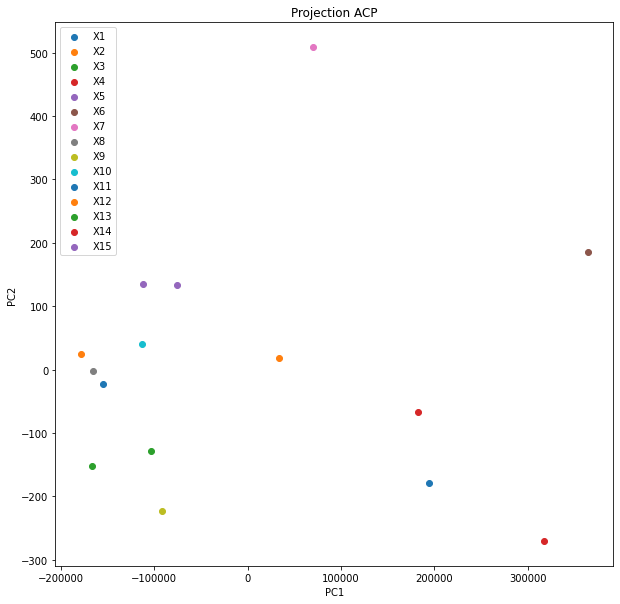

In [321]:
# print(did_proj)
plt.figure(figsize=(10,10))
for composant in comp:
    data = did_proj[df_did[df_barh['Comp'] == composant].index] 
    plt.scatter(data[:, 0], data[:, 1], label=composant)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection ACP')


#### 5.4 Clusters par KMeans


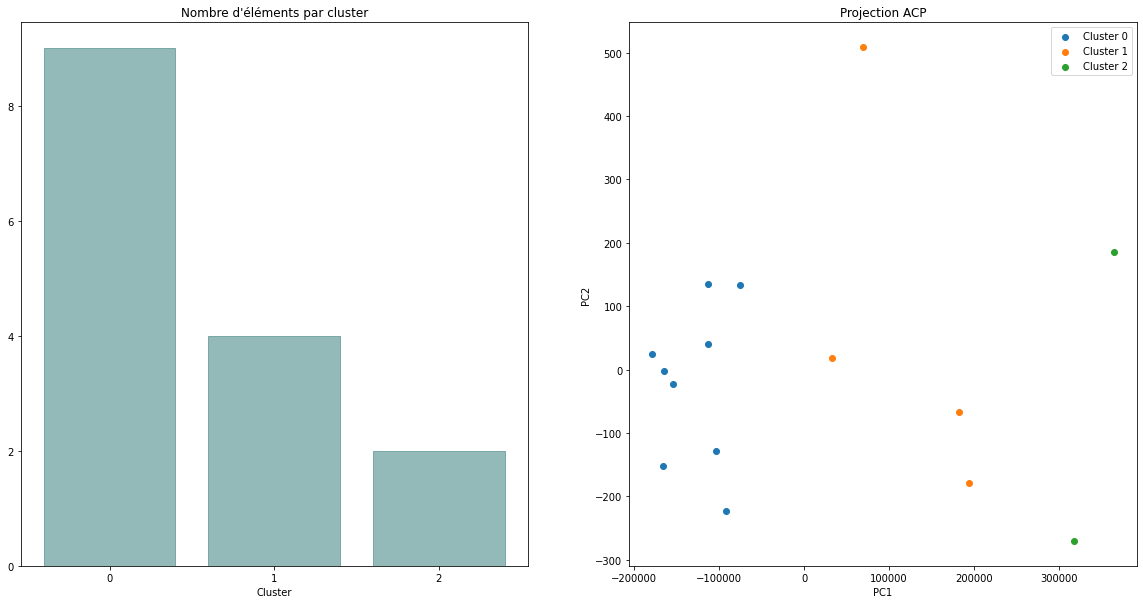

In [322]:
K = 3
km = KMeans(n_clusters=K, n_init=3)
labels = km.fit_predict(df_did)
cnt = np.bincount(labels)

fig,ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].bar(np.arange(K), cnt, tick_label=np.arange(K), color=(0.48, 0.66, 0.66, 0.8),  edgecolor=(0.48, 0.66, 0.66, 1.))
ax[0].set_title('Nombre d\'éléments par cluster')
ax[0].set_xlabel('Cluster')

for c in range(km.n_clusters):
    ax[1].scatter(did_proj[labels == c, 0], did_proj[labels == c, 1], label="Cluster "+str(c))
ax[1].legend()
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Projection ACP');

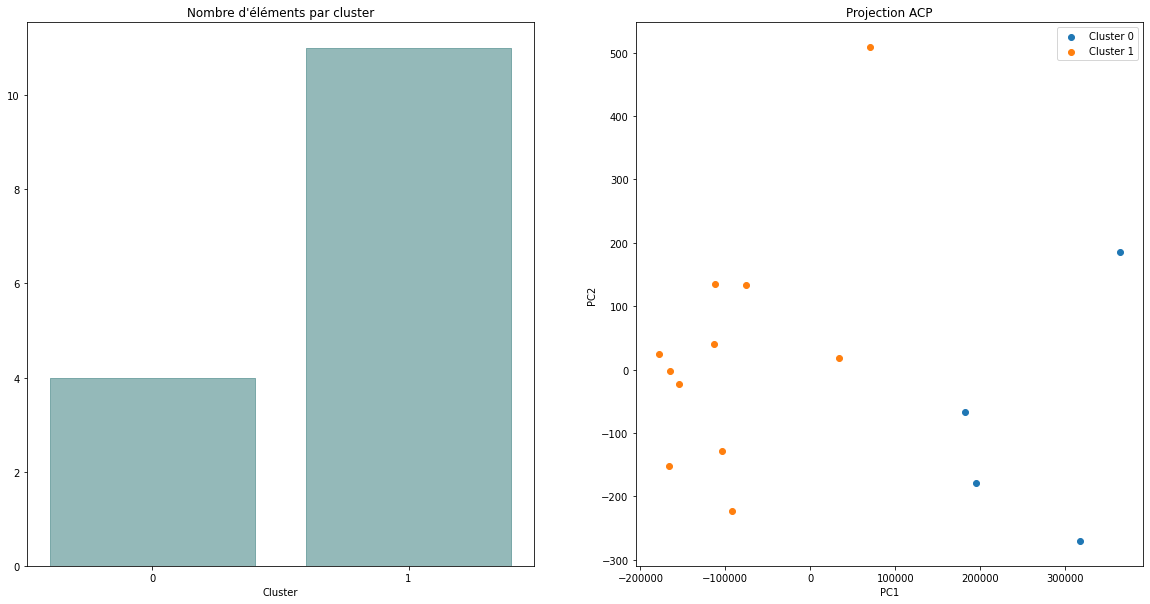

In [323]:
K = 2
km = KMeans(n_clusters=K, n_init=2)
labels = km.fit_predict(df_did)
cnt = np.bincount(labels)

fig,ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].bar(np.arange(K), cnt, tick_label=np.arange(K), color=(0.48, 0.66, 0.66, 0.8),  edgecolor=(0.48, 0.66, 0.66, 1.))
ax[0].set_title('Nombre d\'éléments par cluster')
ax[0].set_xlabel('Cluster')

for c in range(km.n_clusters):
    ax[1].scatter(did_proj[labels == c, 0], did_proj[labels == c, 1], label="Cluster "+str(c))
ax[1].legend()
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Projection ACP');